In [2]:
import datetime as dt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth' ,999)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(3792)

In [3]:
kickoffs_df = pd.read_csv('../data/kickoff_no_nulls.csv')

In [4]:
kickoffs_df.columns

Index(['Unnamed: 0', 'gameId', 'playId', 'playDescription', 'quarter',
       'possessionTeam', 'kickerId', 'returnerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength',
       'kickReturnYardage', 'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties'],
      dtype='object')

In [5]:
kickoffs_df.drop(columns='Unnamed: 0', inplace=True)

''

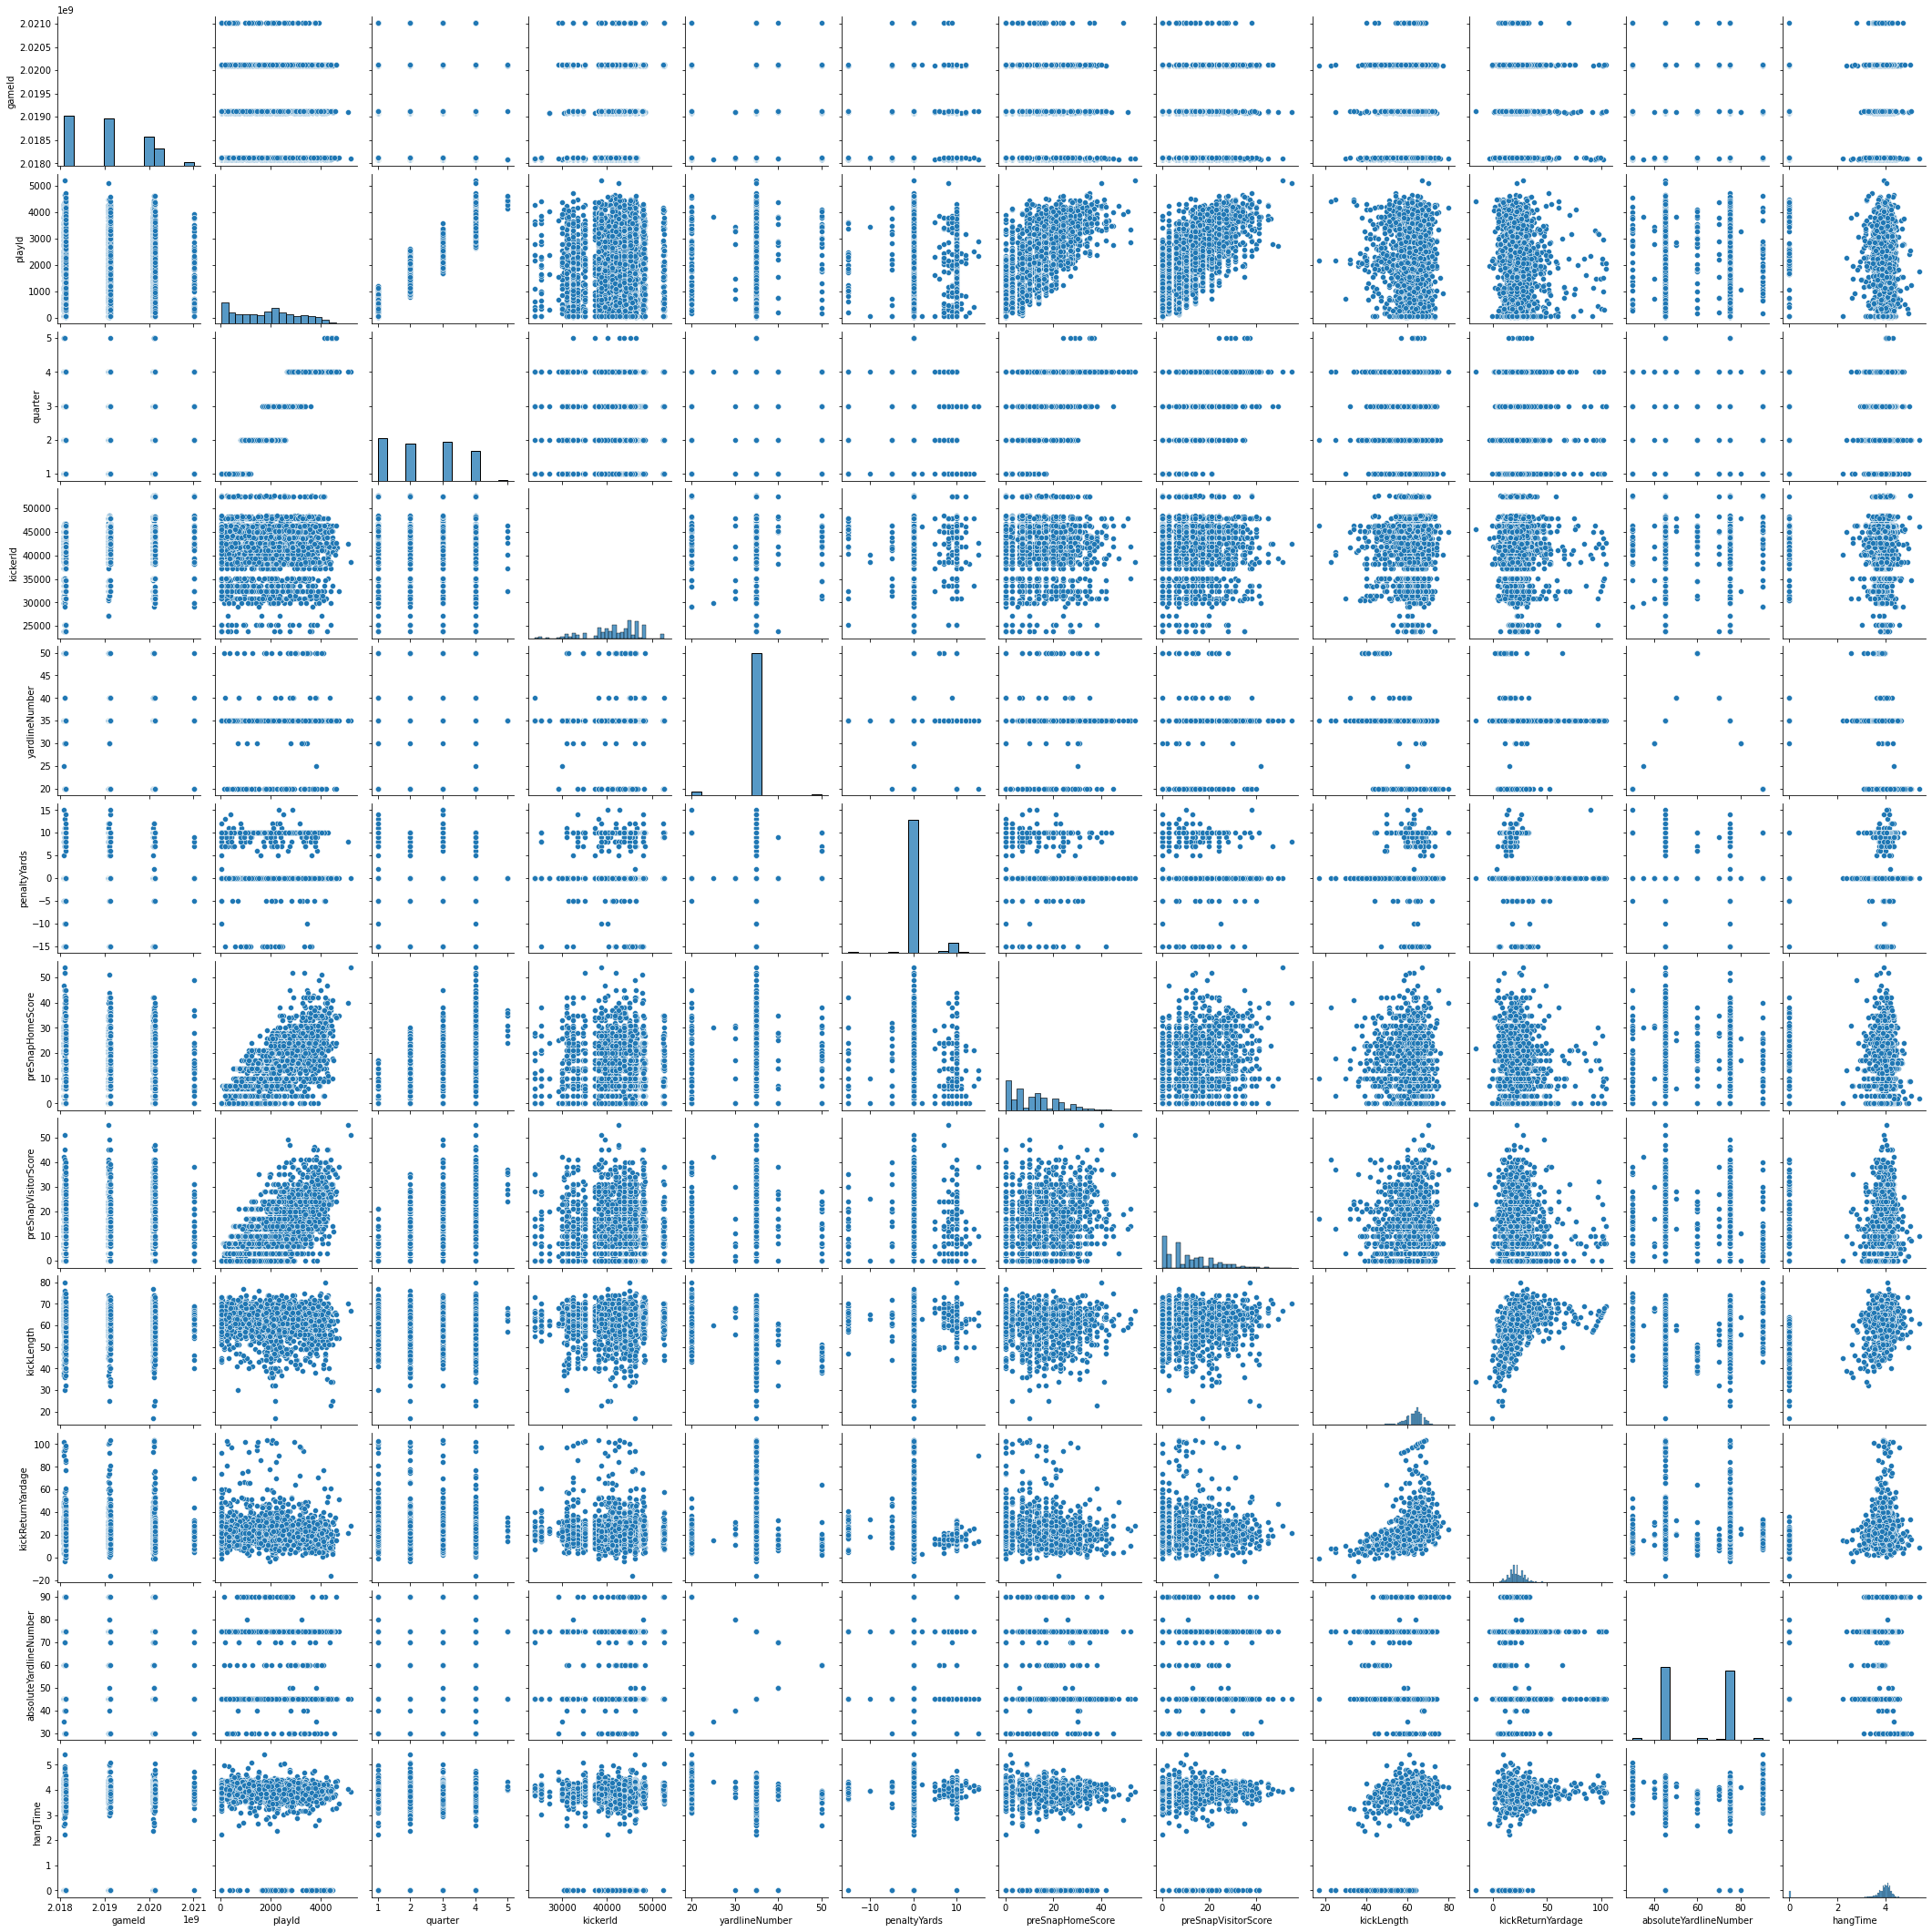

In [6]:
sns.pairplot(kickoffs_df)
;

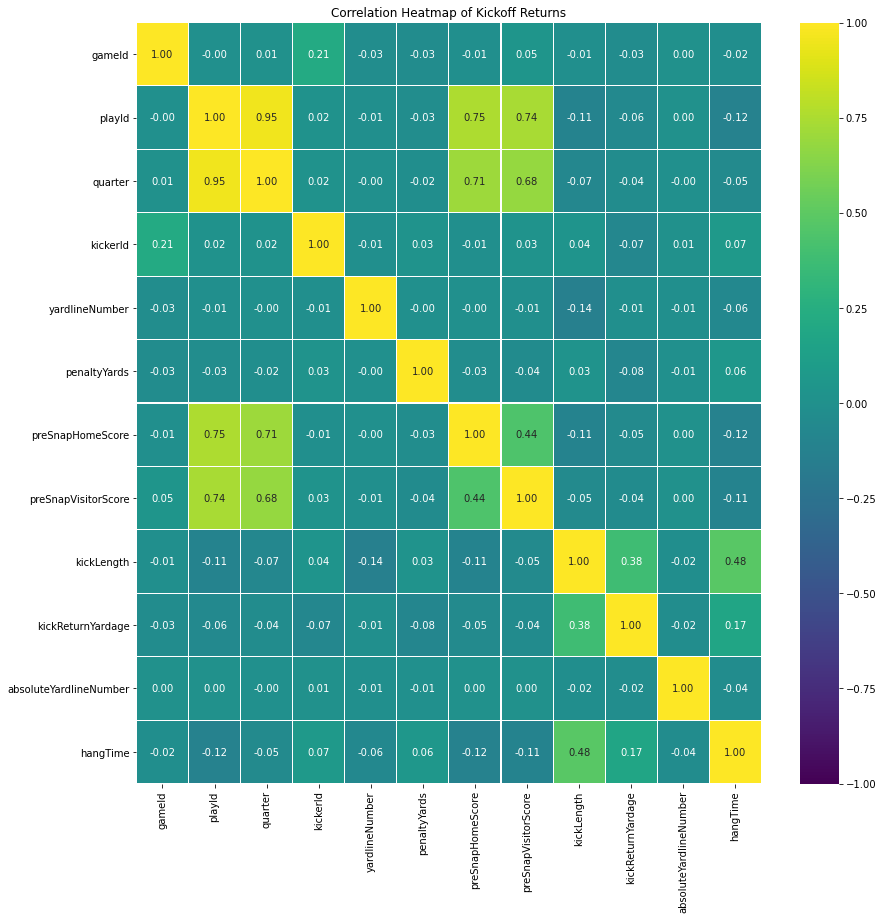

In [15]:
plt.figure(figsize=(14, 14))
sns.heatmap(kickoffs_df.corr(),
           annot= True,
           fmt='.2f',
           linewidths= .1,
           vmin= -1,
           vmax= 1,
           cmap= 'viridis')
plt.title('Correlation Heatmap of Kickoff Returns');

In [21]:
kickoffs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,2642.0,2.019136e+09,859402.669554,2.018091e+09,2.018121e+09,2.019111e+09,2.020102e+09,2.021010e+09
playId,2642.0,1.880626e+03,1239.820990,3.500000e+01,7.717500e+02,1.949500e+03,2.832250e+03,5.189000e+03
quarter,2642.0,2.383800e+00,1.106729,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
kickerId,2642.0,4.175986e+04,5442.497423,2.386000e+04,3.947000e+04,4.250800e+04,4.529600e+04,5.279100e+04
yardlineNumber,2642.0,3.479182e+01,2.862196,2.000000e+01,3.500000e+01,3.500000e+01,3.500000e+01,5.000000e+01
penaltyYards,2642.0,7.047691e-01,3.171945,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
preSnapHomeScore,2642.0,1.221272e+01,10.196154,0.000000e+00,3.000000e+00,1.000000e+01,2.000000e+01,5.400000e+01
preSnapVisitorScore,2642.0,1.132475e+01,9.964712,0.000000e+00,3.000000e+00,1.000000e+01,1.700000e+01,5.500000e+01
kickLength,2642.0,6.231453e+01,6.211885,1.700000e+01,6.000000e+01,6.400000e+01,6.600000e+01,8.000000e+01
kickReturnYardage,2642.0,2.310484e+01,11.045223,-1.600000e+01,1.700000e+01,2.200000e+01,2.700000e+01,1.040000e+02


In [26]:
kickoffs_df.groupby('kickReturnYardage').median().T

kickReturnYardage,-16.0,-3.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,57.0,58.0,59.0,60.0,61.0,64.0,66.0,67.0,70.0,71.0,72.0,74.0,75.0,76.0,77.0,78.0,81.0,84.0,86.0,90.0,92.0,93.0,94.0,95.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0
gameId,2.019122e+09,2.018111e+09,2.020107e+09,2.018116e+09,2.019112e+09,2.018621e+09,2.019612e+09,2.019106e+09,2.020116e+09,2.019120e+09,2.019120e+09,2.019102e+09,2.019106e+09,2.019102e+09,2.020091e+09,2.019111e+09,2.019121e+09,2.019103e+09,2.019121e+09,2.019121e+09,2.019111e+09,2.019111e+09,2.019111e+09,2.019112e+09,2.019111e+09,2.019111e+09,2.019110e+09,2.019111e+09,2.019102e+09,2.019110e+09,2.019101e+09,2.019112e+09,2.019111e+09,2.019111e+09,2.019110e+09,2.019092e+09,2.019112e+09,2.019121e+09,2.018613e+09,2.018121e+09,2.019096e+09,2.019112e+09,2.019110e+09,2.019593e+09,2.019116e+09,2.018616e+09,2.019606e+09,2.020101e+09,2.019112e+09,2.019111e+09,2.019111e+09,2.019117e+09,2.020092e+09,2.018616e+09,2.018121e+09,2.019101e+09,2.020113e+09,2.020121e+09,2.019113e+09,2.019107e+09,2.018622e+09,2.020111e+09,2.018612e+09,2.020111e+09,2.020121e+09,2.019093e+09,2.021010e+09,2.020121e+09,2.019091e+09,2.019101e+09,2.020112e+09,2.020121e+09,2.018122e+09,2.019110e+09,2.019122e+09,2.018120e+09,2.018121e+09,2.018092e+09,2.019101e+09,2.020093e+09,2.018091e+09,2.018102e+09,2.018112e+09,2.020112e+09,2.018122e+09,2.019092e+09,2.019606e+09,2.019102e+09,2.020113e+09,2.019617e+09
playId,4.390000e+03,1.957000e+03,1.108000e+03,2.055500e+03,4.055000e+03,2.657500e+03,2.250000e+03,2.614000e+03,3.601500e+03,2.312000e+03,2.145000e+03,2.302000e+03,2.563500e+03,2.221000e+03,1.911000e+03,2.332000e+03,1.879000e+03,1.947500e+03,1.735000e+03,2.074000e+03,1.870000e+03,1.864000e+03,1.738000e+03,2.041000e+03,1.834000e+03,1.825000e+03,1.688000e+03,1.944000e+03,1.785000e+03,2.053500e+03,1.439000e+03,1.986500e+03,1.469000e+03,2.079500e+03,2.085500e+03,2.071000e+03,2.033000e+03,2.376500e+03,1.870000e+03,1.174000e+03,2.021000e+03,1.873000e+03,1.969000e+03,1.591000e+03,2.735500e+03,2.303500e+03,1.681500e+03,2.075500e+03,1.740500e+03,1.663000e+03,1.830000e+03,2.065000e+02,3.362000e+03,1.420000e+03,1.676000e+03,1.694000e+03,8.610000e+02,4.297000e+03,7.400000e+01,1.074000e+03,1.193000e+03,1.980000e+02,4.267500e+03,2.973000e+03,1.115000e+03,9.630000e+02,2.212000e+03,3.879000e+03,3.176000e+03,3.600000e+01,8.770000e+02,1.086000e+03,4.089000e+03,1.983000e+03,2.530000e+02,2.229000e+03,1.617000e+03,2.325000e+03,3.600000e+01,1.132000e+03,3.300000e+03,1.452000e+03,1.818500e+03,3.154000e+03,1.461000e+03,3.150000e+02,2.138000e+03,1.496000e+03,2.810000e+02,1.957000e+03
quarter,4.000000e+00,2.000000e+00,1.500000e+00,2.000000e+00,4.000000e+00,3.500000e+00,2.500000e+00,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,3.500000e+00,3.000000e+00,2.500000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,2.500000e+00,2.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00,2.000000e+00,1.000000e+00,2.500000e+00,2.000000e+00,1.000000e+00,3.000000e+00
kick

In [9]:
#make_plot function created by Mary Schindler in our DST and Traffic Group project
def make_countplot(dataframe, 
                   x, y=None,
                   hue = None,
                  palete= None):
    
    return sns.countplot(data=dataframe,
                        x = x,
                        hue= hue,
                        palette= palete)

''

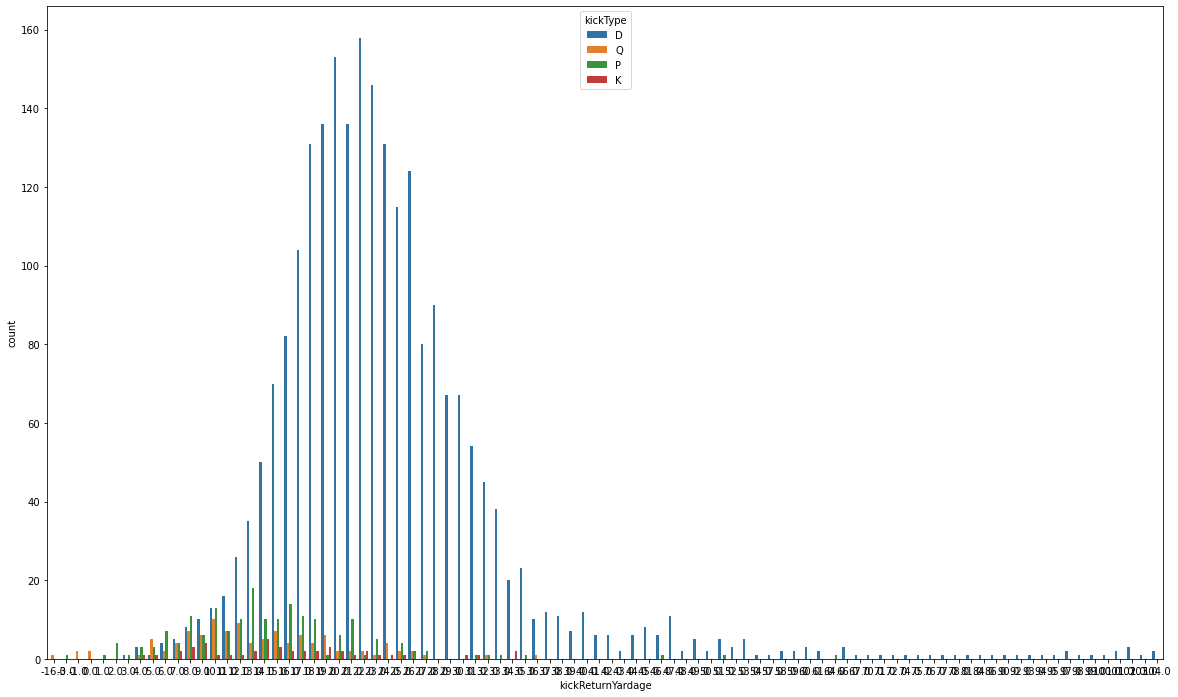

In [10]:
plt.figure(figsize=(20,12))
make_countplot(dataframe=kickoffs_df, x='kickReturnYardage', hue='kickType')
;

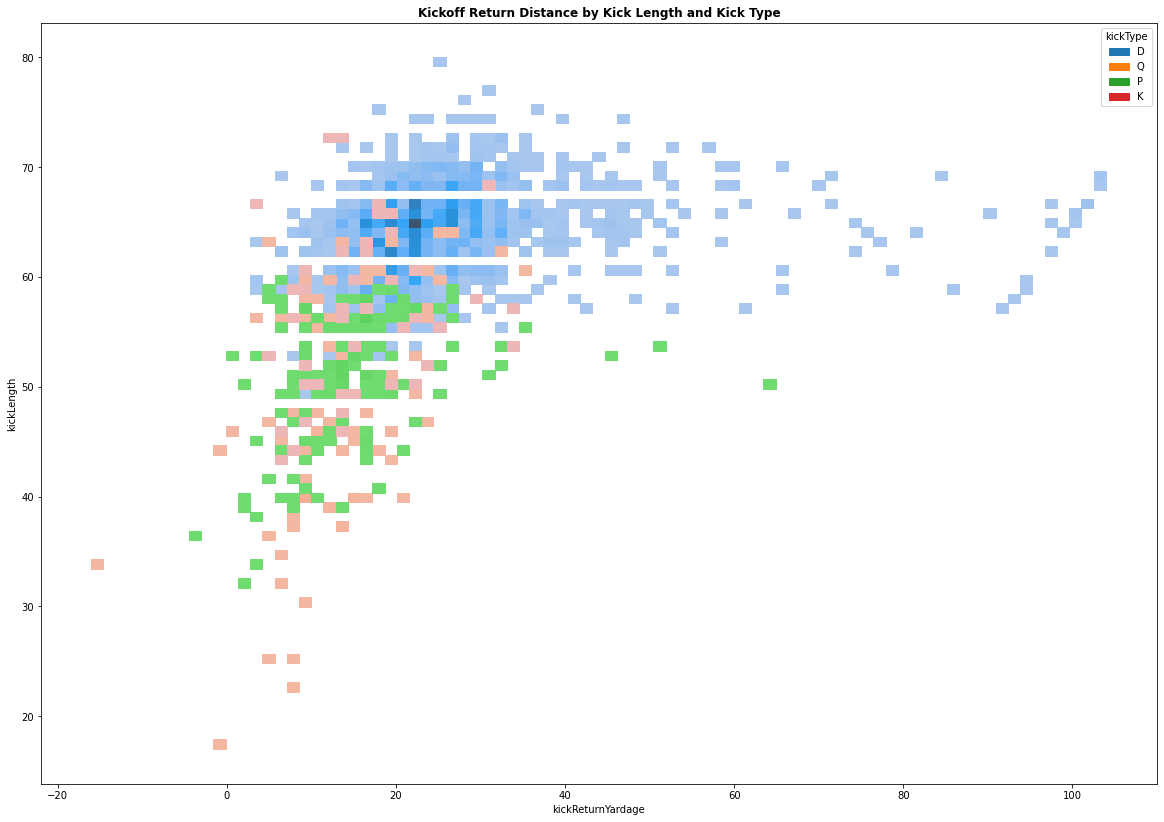

In [47]:
plt.figure(figsize=(20,14))
sns.histplot(data=kickoffs_df, x='kickReturnYardage', y='kickLength', hue='kickType', bins='auto', kde=True)
plt.title('Kickoff Return Distance by Kick Length and Kick Type', fontweight='bold');

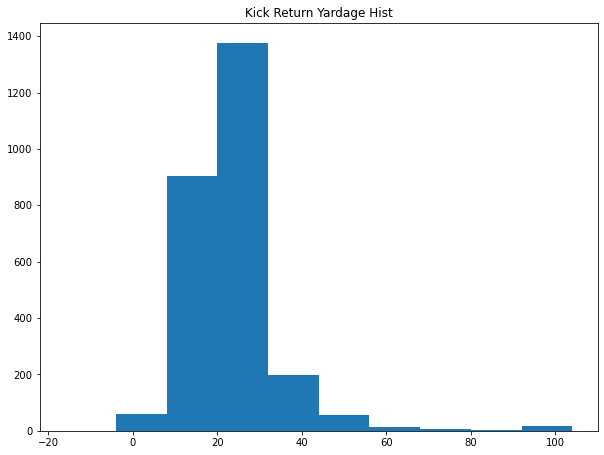

In [51]:
plt.figure(figsize=(10,7.5))
plt.hist(x=kickoffs_df['kickReturnYardage'])
plt.title('Kick Return Yardage Hist');

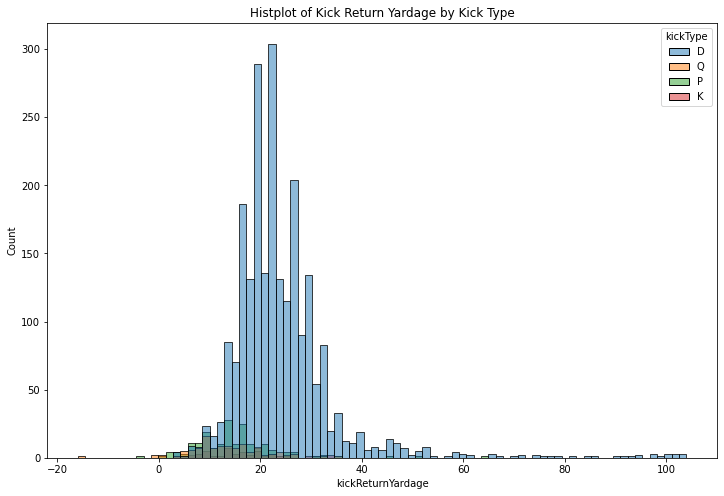

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=kickoffs_df, x='kickReturnYardage', hue= 'kickType')
plt.title('Histplot of Kick Return Yardage by Kick Type');

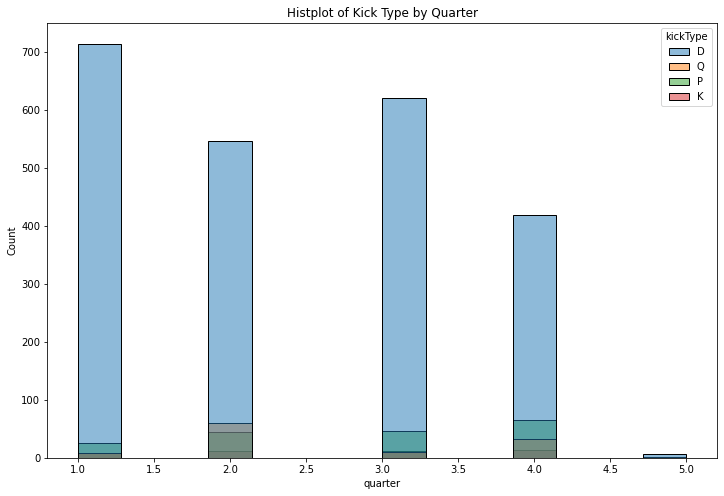

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data=kickoffs_df, x='quarter', hue= 'kickType')
plt.title('Histplot of Kick Type by Quarter');

In [19]:
kickoffs_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'possessionTeam',
       'kickerId', 'returnerId', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'penaltyCodes', 'penaltyJerseyNumbers', 'penaltyYards',
       'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength',
       'kickReturnYardage', 'absoluteYardlineNumber', 'hangTime', 'kickType',
       'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation',
       'specialTeamsSafeties'],
      dtype='object')

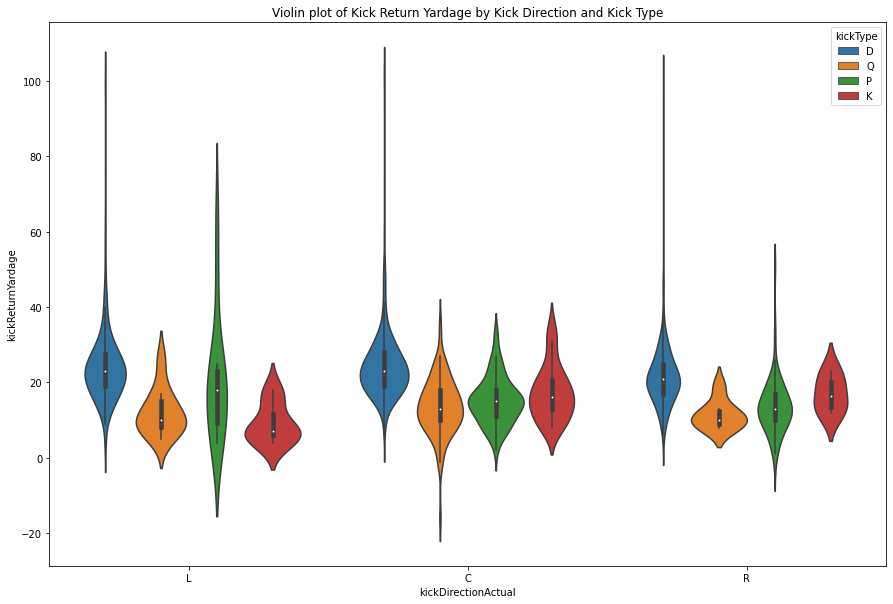

In [36]:
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionActual', order=['L', 'C', 'R'],
              hue='kickType',  orient= 'v')
plt.title('Violin plot of Kick Return Yardage by Kick Direction and Kick Type');

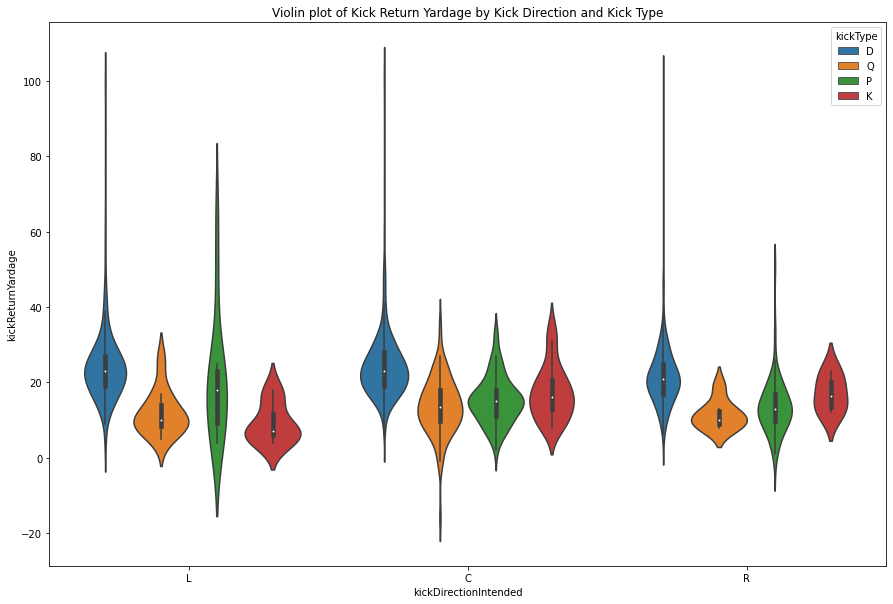

In [38]:
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionIntended', order=['L', 'C', 'R'],
              hue='kickType',  orient= 'v')
plt.title('Violin plot of Kick Return Yardage by Kick Direction and Kick Type');

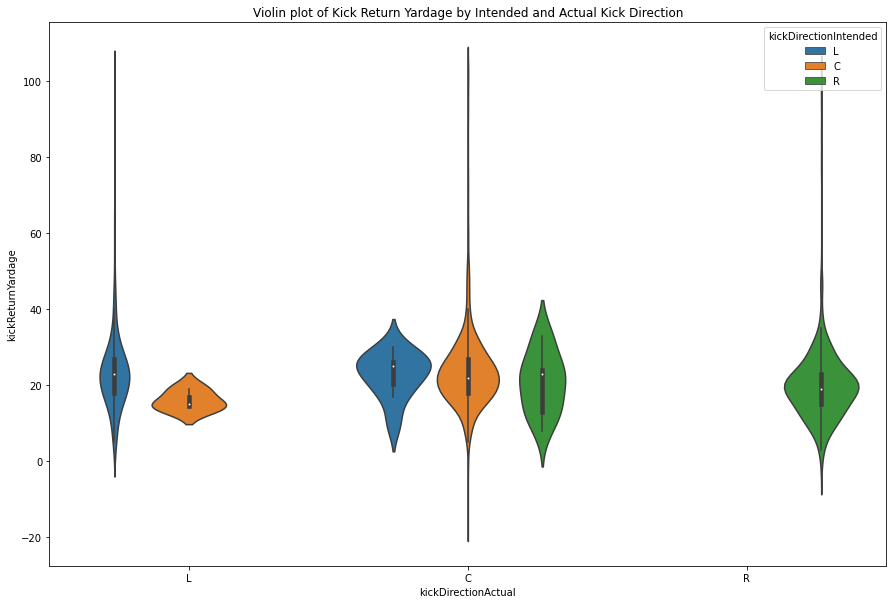

In [41]:
#Rename labels for clarity and make sure the LCR go in that order.
plt.figure(figsize=(15,10))

sns.violinplot(data=kickoffs_df,
              y='kickReturnYardage',
              x='kickDirectionActual', order=['L', 'C', 'R'],
              hue='kickDirectionIntended', hue_order= ['L', 'C', 'R'],
              orient= 'v')
plt.title('Violin plot of Kick Return Yardage by Intended and Actual Kick Direction');